# A workbook containing analysis of crimes that occurred in Los Angeles, USA.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## Frequency of Crimes Committed Every Hour

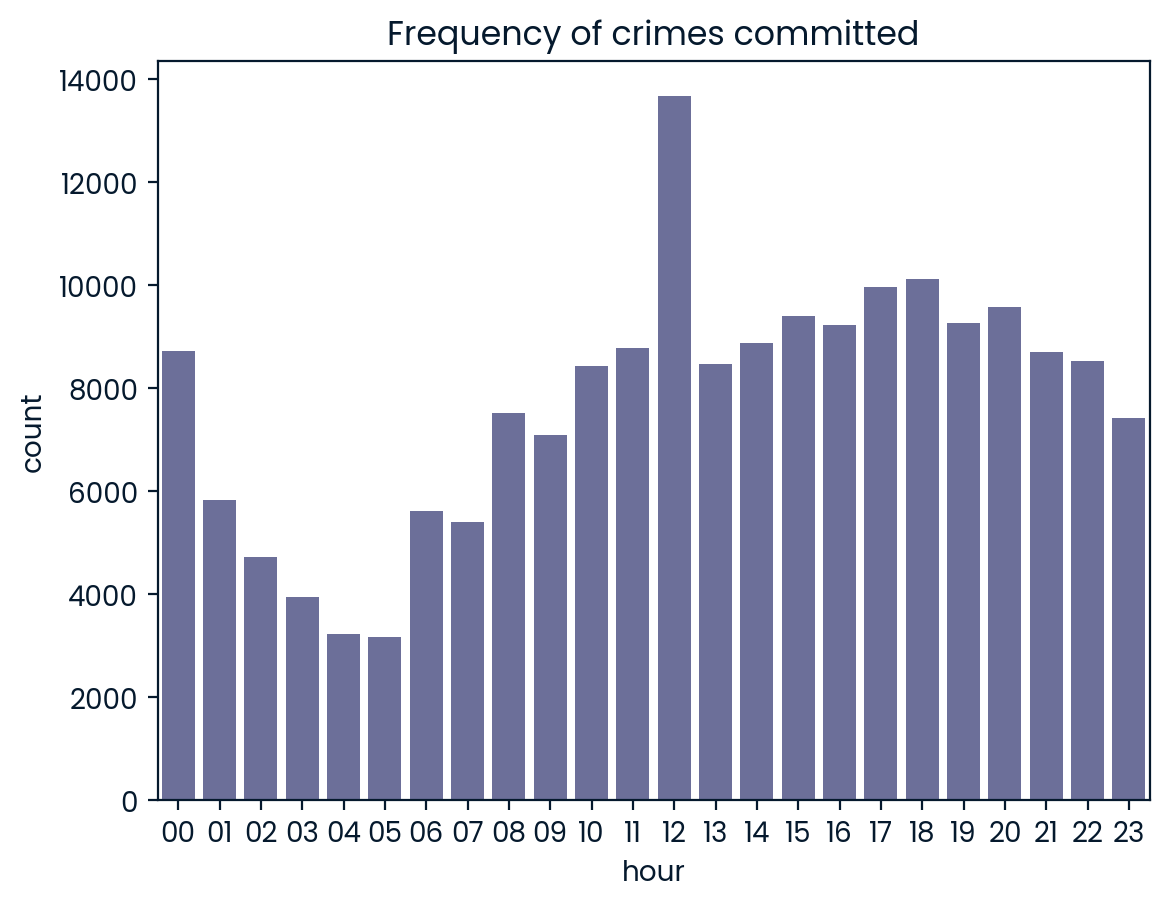

In [115]:
crimes['HOUR OCC'] = crimes["TIME OCC"].str[:2]

hour_order = sorted(crimes['HOUR OCC'].unique())
ax = sns.countplot(data=crimes, x='HOUR OCC', order=hour_order)
ax.set_xlabel('hour') 
ax.set_title('Frequency of crimes committed')
plt.show()

## Hour with the highest crime frequency

In [116]:
peak_crime_hour = int(crimes['HOUR OCC'].value_counts().idxmax())
peak_crime_hour

12

## Frequency of Night Crimes Based on Area 

In [117]:
# extracting data with occurrence of crimes in night hours
night_crimes = crimes[crimes['HOUR OCC'].isin(['22', '23', '00', '01', '02', '03'])]
print(night_crimes.head())

        DR_NO  Date Rptd  ...                                  LOCATION HOUR OCC
8   231207476 2023-02-27  ...   8800    HAAS                         AV       00
10  221711184 2022-06-15  ...   8300    WHITE OAK                    AV       01
30  221314362 2022-07-11  ...   1600 E  OLYMPIC                      BL       00
33  231307252 2023-03-03  ...                          6600 S  BROADWAY       23
36  221614254 2022-11-13  ...  10200    TELFAIR                      AV       00

[5 rows x 13 columns]


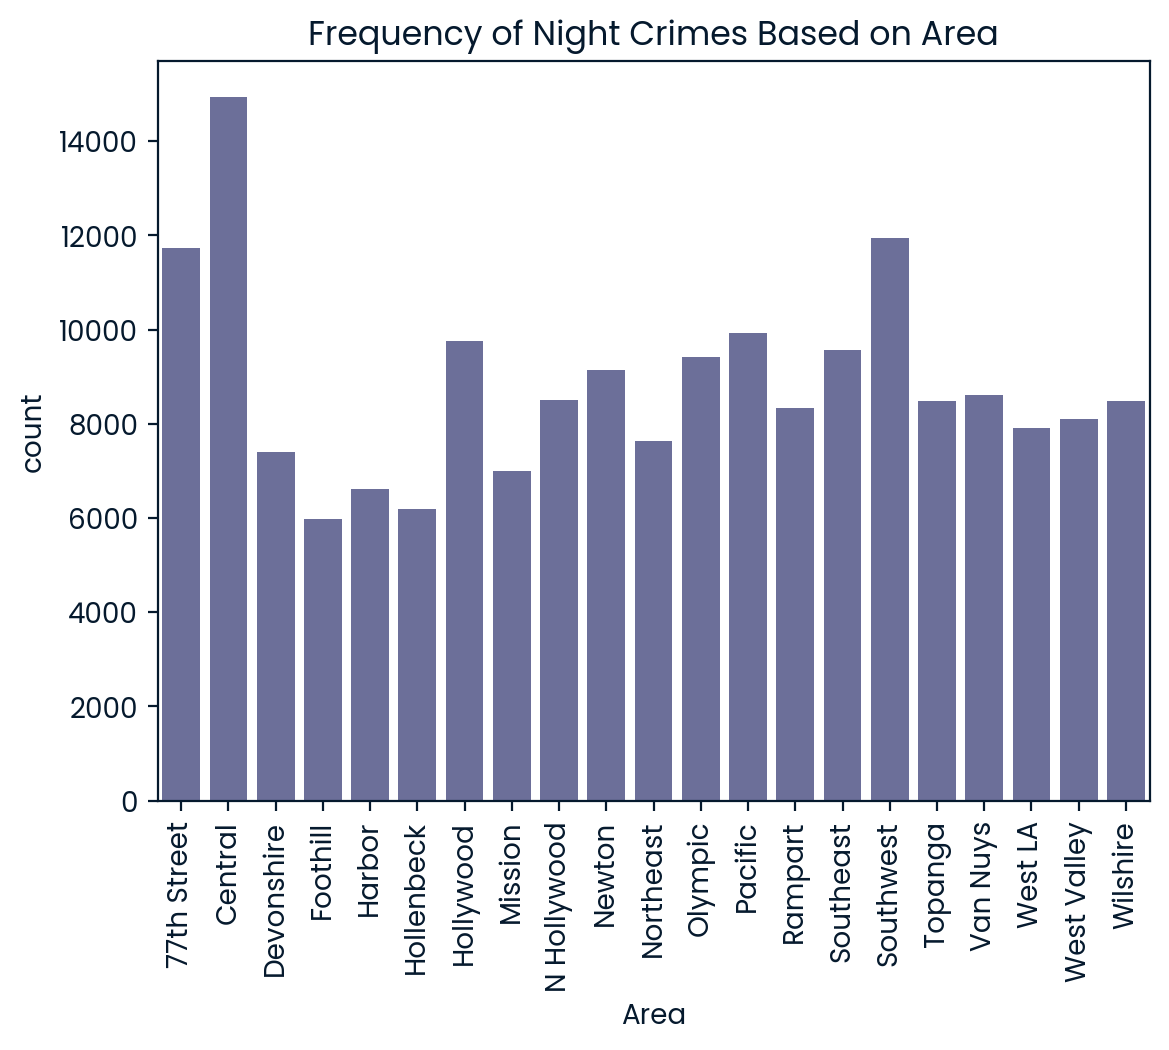

In [118]:
# Visualizing frequency of night crimes based on location
area_order = sorted(crimes['AREA NAME'].unique())
ax = sns.countplot(data=crimes, x='AREA NAME', order= area_order)
ax.set_xlabel('Area')
ax.set_title('Frequency of Night Crimes Based on Area')
plt.xticks(rotation=90)
plt.show()


## Area With the Largest Frequency of Night Crimes

In [119]:
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()
peak_night_crime_location

'Central'

## Number of Crimes Against Victims Based on Age

In [120]:
agegroup_labels = ["0-17", '18-25','26-34','35-44','45-54','55-64','65+']
filtered_crimes = crimes[crimes['Vict Age'] >= 0]
age_bins = [0, 18, 26, 35, 45, 55, 65, 100]
# Column for Age Bracket of Victims
crimes['Age Bracket'] = pd.cut(filtered_crimes['Vict Age'], bins=age_bins, labels=agegroup_labels, right=False)

In [121]:
# Sorted by age group
victim_ages = crimes['Age Bracket'].value_counts().sort_index()
victim_ages

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Age Bracket, dtype: int64